In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [37]:
LeadScore_df = pd.read_csv("LeadScore.csv", encoding='latin-1',parse_dates=['Web_Date'])
LeadScore_df

,Full_Name,Requested_Amount,Web_Amount to Borrow,Amount to Borrow,Annual_Revenue,Web_Gross Annual Sales,Gross_Annual_Sales,Lead_Score,LeadID,Self Graded Credit,Lead_Self_Graded_Credit,Is_Submitted,Web_Ad Outlet,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
0,David Harris,NaN,"$10,000 to $25,000","$10,000 to $25,000",NaN,"Less than $100,000","Less than $100,000",11,00Q4u00001eYBsYEAW,2.0,2.0,0,101.0,101.0,2021-04-11,NaN,0
1,Pedro Rodriguez,NaN,NaN,"150,000.00",NaN,NaN,$500k-$1mm,8,00Q4u00001cJlowEAC,NaN,NaN,1,1105.0,1105.0,2019-05-02,Digital - Affiliate,0
2,Lashandra Fulcher,NaN,NaN,"$10,000 to $25,000",NaN,NaN,NaN,24,00Q4u00001fOHswEAG,NaN,3.0,1,1119.0,1119.0,2021-06-08,Digital - Affiliate,0
3,Gary Nunez,NaN,NaN,"$25,000 to $50,000",NaN,NaN,$100k-$200k,24,00Q4u00001ebawUEAQ,NaN,3.0,1,1119.0,1119.0,2021-05-03,Digital - Affiliate,0
4,Sonja Williams,NaN,NaN,"$10,000 to $25,000",NaN,NaN,$1mm+,24,00Q4u00001f1eZyEAI,NaN,3.0,1,1119.0,1119.0,2021-05-09,Digital - Affiliate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22829,Richard Hamlett,50000.0,NaN,NaN,150000.0,NaN,NaN,24,00Q4u00001eb1gBEAQ,4.0,4.0,0,1101.0,1101.0,2021-04-28,Lending Tree,0
22830,Gregory Jones,NaN,NaN,"$5,000 to $10,000",NaN,NaN,"Less than $100,000",14,00Q4u00001eapmMEAQ,NaN,4.0,1,1280.0,1000.0,2021-04-26,Strategic Partners,0
22831,Carl Baltes,NaN,"25,000.00","25,000.00",NaN,"Less than $100,000","Less than $100,000",6,00Q4u00001eYNzFEAW,NaN,NaN,0,1202.0,NaN,2021-04-13,Strategic Partners,0
22832,emeline akuta,NaN,"$100,000 or More","$100,000 or More",NaN,$100k-$200k,$100k-$200k,14,00Q4u00001e3z4PEAQ,3.0,3.0,0,1226.0,1226.0,2021-04-01,Strategic Partners,0


In [38]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22834 entries, 0 to 22833
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Full_Name                22834 non-null  object        
 1   Requested_Amount         9177 non-null   float64       
 2   Web_Amount to Borrow     13433 non-null  object        
 3   Amount to Borrow         13729 non-null  object        
 4   Annual_Revenue           15712 non-null  float64       
 5   Web_Gross Annual Sales   14420 non-null  object        
 6   Gross_Annual_Sales       17037 non-null  object        
 7   Lead_Score               22834 non-null  int64         
 8   LeadID                   22834 non-null  object        
 9   Self Graded Credit       21891 non-null  float64       
 10  Lead_Self_Graded_Credit  22402 non-null  float64       
 11  Is_Submitted             22834 non-null  int64         
 12  Web_Ad Outlet            22514 n

In [39]:
LeadScore_df.isnull().sum()

Full_Name                      0
Requested_Amount           13657
Web_Amount to Borrow        9401
Amount to Borrow            9105
Annual_Revenue              7122
Web_Gross Annual Sales      8414
Gross_Annual_Sales          5797
Lead_Score                     0
LeadID                         0
Self Graded Credit           943
Lead_Self_Graded_Credit      432
Is_Submitted                   0
Web_Ad Outlet                320
Ad_Outlet                    349
Web_Date                       0
Ad_Outlet_Source               1
Is_Funded                      0
dtype: int64

In [40]:
LeadScore_df.columns

Index(['Full_Name', 'Requested_Amount', 'Web_Amount to Borrow',
       'Amount to Borrow', 'Annual_Revenue', 'Web_Gross Annual Sales',
       'Gross_Annual_Sales', 'Lead_Score', 'LeadID ', 'Self Graded Credit',
       'Lead_Self_Graded_Credit', 'Is_Submitted', 'Web_Ad Outlet', 'Ad_Outlet',
       'Web_Date', 'Ad_Outlet_Source', 'Is_Funded'],
      dtype='object')

In [41]:
LeadScore_df['Amount to Borrow'] = LeadScore_df['Amount to Borrow'].str.replace(',','')

In [42]:
LeadScore_df['Requested_Amount'].fillna(LeadScore_df['Amount to Borrow'], inplace = True)
LeadScore_df['Gross_Annual_Sales'].fillna(LeadScore_df['Web_Gross Annual Sales'], inplace = True)
LeadScore_df['Lead_Self_Graded_Credit'].fillna(LeadScore_df['Self Graded Credit'], inplace = True)
LeadScore_df['Amount to Borrow'].fillna(LeadScore_df['Web_Amount to Borrow'], inplace = True)
LeadScore_df['Ad_Outlet'].fillna(LeadScore_df['Web_Ad Outlet'], inplace = True)
LeadScore_df['Annual_Revenue'].fillna(LeadScore_df['Web_Gross Annual Sales'], inplace = True)

In [43]:
LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [44]:
LeadScore_df = LeadScore_df.drop(['Web_Amount to Borrow', 'Web_Gross Annual Sales', 'Self Graded Credit','Web_Ad Outlet'], axis=1)
LeadScore_df.head()

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
0,David Harris,$10000 to $25000,$10000 to $25000,"Less than $100,000","Less than $100,000",11,00Q4u00001eYBsYEAW,2.0,0,101.0,2021-04-11,NaN,0
1,Pedro Rodriguez,150000.00,150000.00,NaN,$500k-$1mm,8,00Q4u00001cJlowEAC,NaN,1,1105.0,2019-05-02,Digital - Affiliate,0
2,Lashandra Fulcher,$10000 to $25000,$10000 to $25000,NaN,NaN,24,00Q4u00001fOHswEAG,3.0,1,1119.0,2021-06-08,Digital - Affiliate,0
3,Gary Nunez,$25000 to $50000,$25000 to $50000,NaN,$100k-$200k,24,00Q4u00001ebawUEAQ,3.0,1,1119.0,2021-05-03,Digital - Affiliate,0
4,Sonja Williams,$10000 to $25000,$10000 to $25000,NaN,$1mm+,24,00Q4u00001f1eZyEAI,3.0,1,1119.0,2021-05-09,Digital - Affiliate,0


In [124]:
LeadScore_df = LeadScore_df.dropna()
LeadScore_df

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
38,FLOYD JORDAN,25000.0,25000.0,35000.0,35000.0,8,00Q4u00001eb8MWEAY,1.0,0,1105.0,2021-04-29,0,0
39,Adanya Cleveland,5000.0,5000.0,35000.0,35000.0,8,00Q4u00001eXtEuEAK,1.0,0,1118.0,2021-04-07,0,0
53,Darren Anderson,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001ebO6QEAU,2.0,0,1119.0,2021-04-30,0,0
55,Arthur Thomas,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001eaxWDEAY,2.0,0,1119.0,2021-04-27,0,0
57,Janis Roberts,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001ebJI7EAM,2.0,0,1119.0,2021-04-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14960,Guy Martin,17500.0,17500.0,35000.0,35000.0,14,00Q4u00001eY1mHEAS,3.0,0,1101.0,2021-04-08,4,0
16240,Keya Sleister,37500.0,37500.0,150000.0,150000.0,15,00Q4u00001eYl2SEAS,3.0,0,1101.0,2021-04-14,4,0
16381,John Meharg,25000.0,25000.0,35000.0,35000.0,17,00Q4u00001b183MEAQ,4.0,1,1101.0,2020-09-10,4,0
17763,Manuel Gonzalez,37500.0,37500.0,150000.0,150000.0,18,00Q4u00001ebmKcEAI,4.0,0,1101.0,2021-05-04,4,0


In [46]:
LeadScore_df.groupby('Requested_Amount').mean()['Lead_Score'].round(decimals=2)

Requested_Amount
$10000 to $25000     15.52
$100000 or More      13.98
$25000 to $50000     15.08
$5000 to $10000      12.66
$50000 to $100000    13.38
100000 or More       10.82
150000.00            13.15
25000.00             15.41
250000.00            13.71
5000.00              15.72
75000.00             13.64
Name: Lead_Score, dtype: float64

In [47]:
LeadScore_df.groupby('Gross_Annual_Sales').mean()['Lead_Score'].round(decimals=2)

Gross_Annual_Sales
$100k-$200k           14.94
$1mm+                 17.21
$200k-$500k           14.90
$500k-$1mm            15.68
Less than $100,000    14.13
Name: Lead_Score, dtype: float64

In [48]:
LeadScore_df.groupby('Annual_Revenue').mean()['Lead_Score'].round(decimals=2)

Annual_Revenue
0.0                   14.27
14147.0               14.00
14186.0               14.12
15566.0               16.00
16241.0               13.67
                      ...  
$100k-$200k           15.59
$1mm+                 19.00
$200k-$500k           14.92
$500k-$1mm            17.11
Less than $100,000    14.40
Name: Lead_Score, Length: 234, dtype: float64

In [49]:
LeadScore_df.groupby('Amount to Borrow').mean()['Lead_Score'].round(decimals=2)

Amount to Borrow
$10000 to $25000     15.52
$100000 or More      13.98
$25000 to $50000     15.08
$5000 to $10000      12.66
$50000 to $100000    13.38
100000 or More       10.82
150000.00            13.15
25000.00             15.41
250000.00            13.71
5000.00              15.72
75000.00             13.64
Name: Lead_Score, dtype: float64

In [50]:
LeadScore_df.groupby('Ad_Outlet_Source').mean()['Lead_Score'].round(decimals=2)

Ad_Outlet_Source
Digital - Affiliate    23.24
Digital-Organic        14.29
Digital-PPC            14.67
Direct                 14.23
Lending Tree           16.00
Strategic Partners     14.00
Name: Lead_Score, dtype: float64

In [51]:
LeadScore_df.groupby('Lead_Self_Graded_Credit').mean()['Lead_Score'].round(decimals=2)

Lead_Self_Graded_Credit
1.0     8.69
2.0    11.68
3.0    14.08
4.0    16.69
Name: Lead_Score, dtype: float64

In [130]:
LeadScore_df.groupby('Is_Funded').mean()['Lead_Score'].round(decimals=2)

Is_Funded
0    14.51
1    14.66
Name: Lead_Score, dtype: float64

In [52]:
from sklearn.preprocessing import LabelEncoder
Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Requested_Amount'].replace(Amount_dict, inplace=True)

Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
LeadScore_df['Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

LeadScore_df['Annual_Revenue'].replace(Revenue_dict, inplace=True)

Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Amount to Borrow'].replace(Borrow_dict, inplace=True)

LeadScore_df.sample(5)

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
4291,Randy Lillie,25000.00,25000.00,35000.0,35000.0,17,00Q4u00001eXeZDEA0,4.0,1,1010.0,2021-04-05,Digital-PPC,0
9842,NICHOLAS CONNELL,17500.0,17500.0,0.0,35000.0,14,00Q4u00001e2MoVEAU,3.0,0,5190.0,2021-04-26,Direct,0
3118,Robert Hernandez,25000.00,25000.00,350000.0,350000.0,13,00Q4u00001eZIMvEAO,2.0,0,1010.0,2021-04-19,Digital-PPC,0
12621,KRISLYNE PIERRE,37500.0,37500.0,0.0,35000.0,17,00Q4u00001ea4KhEAI,4.0,0,5061.0,2021-06-06,Direct,0
7503,JEANNE HELLER,75000.0,75000.0,35000.0,35000.0,13,00Q4u00001b12owEAA,3.0,0,5081.0,2021-04-18,Direct,0


In [53]:
LeadScore_df["Requested_Amount"]= pd.to_numeric(LeadScore_df["Requested_Amount"], downcast="float")
LeadScore_df["Amount to Borrow"]= pd.to_numeric(LeadScore_df["Amount to Borrow"], downcast="float")
LeadScore_df.head()                                                 

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
38,FLOYD JORDAN,25000.0,25000.0,35000.0,35000.0,8,00Q4u00001eb8MWEAY,1.0,0,1105.0,2021-04-29,Digital - Affiliate,0
39,Adanya Cleveland,5000.0,5000.0,35000.0,35000.0,8,00Q4u00001eXtEuEAK,1.0,0,1118.0,2021-04-07,Digital - Affiliate,0
53,Darren Anderson,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001ebO6QEAU,2.0,0,1119.0,2021-04-30,Digital - Affiliate,0
55,Arthur Thomas,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001eaxWDEAY,2.0,0,1119.0,2021-04-27,Digital - Affiliate,0
57,Janis Roberts,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001ebJI7EAM,2.0,0,1119.0,2021-04-29,Digital - Affiliate,0


In [54]:
Outlet_dict = {"Digital - Affiliate":0, "Digital-Organic":1, "Direct":2 ,"Digital-PPC":3, "Lending Tree":4, 'Strategic Partners':5}
             
LeadScore_df['Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [55]:
#pd.options.display.float_format = '{:,.2f}'.format

In [56]:
LeadScore_df.dtypes

Full_Name                          object
Requested_Amount                  float32
Amount to Borrow                  float32
Annual_Revenue                    float64
Gross_Annual_Sales                float64
Lead_Score                          int64
LeadID                             object
Lead_Self_Graded_Credit           float64
Is_Submitted                        int64
Ad_Outlet                         float64
Web_Date                   datetime64[ns]
Ad_Outlet_Source                    int64
Is_Funded                           int64
dtype: object

array([<AxesSubplot:title={'center':'Lead_Self_Graded_Credit'}, xlabel='Is_Funded'>,
       <AxesSubplot:title={'center':'Lead_Score'}, xlabel='Is_Funded'>],
      dtype=object)

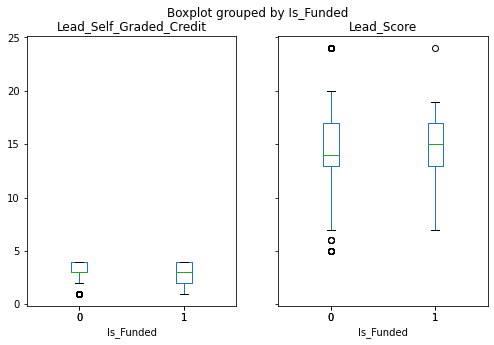

In [57]:
LeadScore_df.boxplot(by ='Is_Funded', column=['Lead_Self_Graded_Credit','Lead_Score'], grid=False, figsize=(8,5))

In [58]:
LeadScore_df.describe()

,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Ad_Outlet_Source,Is_Funded
count,10885.000000,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10885.000000,10885.000000,10885.000000
mean,37336.554688,37336.554688,5.826131e+04,134035.829123,14.507487,3.15526,0.095085,4017.868167,1.998071,0.012586
std,33554.761719,33554.761719,1.625495e+05,194662.434576,3.147084,0.91987,0.293346,1779.357354,0.576312,0.111485
min,5000.000000,5000.000000,0.000000e+00,35000.000000,5.000000,1.00000,0.000000,1000.000000,0.000000,0.000000
25%,17500.000000,17500.000000,0.000000e+00,35000.000000,13.000000,3.00000,0.000000,1119.000000,2.000000,0.000000
50%,37500.000000,37500.000000,0.000000e+00,35000.000000,14.000000,3.00000,0.000000,5061.000000,2.000000,0.000000
75%,37500.000000,37500.000000,3.500000e+04,150000.000000,17.000000,4.00000,0.000000,5061.000000,2.000000,0.000000
max,250000.000000,250000.000000,4.725000e+06,1000000.000000,24.000000,4.00000,1.000000,5192.000000,5.000000,1.000000


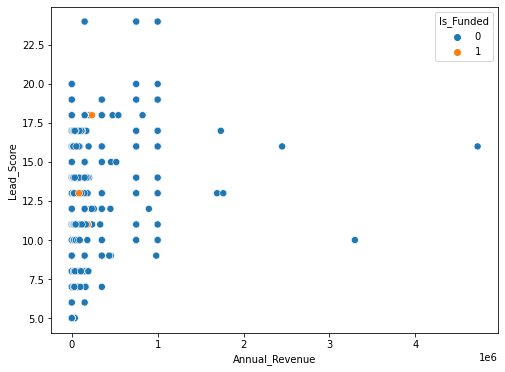

In [129]:
#%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot("Annual_Revenue","Lead_Score", hue="Is_Funded", data=LeadScore_df, s=50)
plt.show()

In [125]:
LeadScore_df.corr()

,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Ad_Outlet_Source,Is_Funded
Requested_Amount,1.000000,1.000000,0.222259,0.272665,-0.069736,-0.213117,0.031569,-0.160655,0.155773,0.040716
Amount to Borrow,1.000000,1.000000,0.222259,0.272665,-0.069736,-0.213117,0.031569,-0.160655,0.155773,0.040716
Annual_Revenue,0.222259,0.222259,1.000000,0.584387,0.177248,-0.120623,0.043062,-0.348852,-0.198623,0.036905
Gross_Annual_Sales,0.272665,0.272665,0.584387,1.000000,0.170457,-0.193575,0.095505,-0.059057,-0.164869,0.091392
Lead_Score,-0.069736,-0.069736,0.177248,0.170457,1.000000,0.758830,0.031823,-0.143131,-0.196873,0.005362
Lead_Self_Graded_Credit,-0.213117,-0.213117,-0.120623,-0.193575,0.758830,1.000000,-0.003301,0.028500,0.055678,-0.030704
Is_Submitted,0.031569,0.031569,0.043062,0.095505,0.031823,-0.003301,1.000000,0.002119,-0.050001,0.278057
Ad_Outlet,-0.160655,-0.160655,-0.348852,-0.059057,-0.143131,0.028500,0.002119,1.000000,0.003587,0.008935
Ad_Outlet_Source,0.155773,0.155773,-0.198623,-0.164869,-0.196873,0.055678,-0.050001,0.003587,1.000000,-0.013922
Is_Funded,0.040716,0.040716,0.036905,0.091392,0.005362,-0.030704,0.278057,0.008935,-0.013922,1.000000


In [131]:
X = LeadScore_df[['Requested_Amount','Annual_Revenue','Amount to Borrow','Gross_Annual_Sales',
                  'Ad_Outlet_Source','Is_Submitted','Lead_Self_Graded_Credit']]

y = LeadScore_df[['Lead_Score']]

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
X_train.shape, y_train.shape

((7619, 7), (7619, 1))

In [135]:
X_test.shape, y_test.shape

((3266, 7), (3266, 1))

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 250.259173
Feature 1: 148.847020
Feature 2: 250.259173
Feature 3: 915.621534
Feature 4: 85.699695
Feature 5: 86.325736
Feature 6: 804.493976


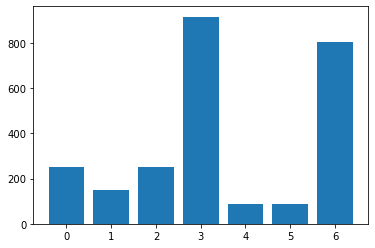

In [137]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [138]:
KNN_model = KNeighborsClassifier()

In [139]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.95406523 0.96600827 0.95819936 0.95498392 0.95406523]
Mean Accuracy Score for KNN: 0.9574644005512173


In [140]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.9667432246210381


In [141]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 6, 'max_features': None, 'splitter': 'best'}

In [142]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [143]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 94.09530809751317
Out-of-sample Accuracy: 94.04849375459222


In [144]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  24   3   2   1   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0  87   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  13  33   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  13  51   1   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 295   5   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  91  23   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 120   2   1   5   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  10 637   9   2   1   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 134   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 624   0   3   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1 164   

In [145]:
feature_names = X = LeadScore_df[['Requested_Amount','Annual_Revenue','Amount to Borrow','Gross_Annual_Sales',
                  'Ad_Outlet_Source','Is_Submitted','Lead_Self_Graded_Credit']]

In [146]:
#print(feature_names)
model.feature_importances_

array([0.27096673, 0.00382098, 0.22094253, 0.29659611, 0.01647667,
       0.        , 0.19119698])

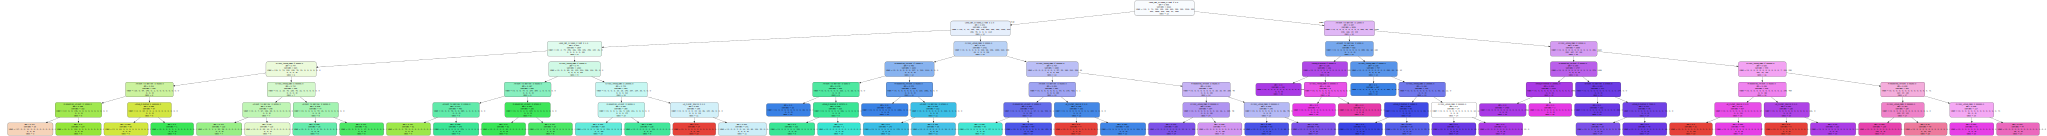

<Figure size 1440x1080 with 0 Axes>

In [147]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [148]:
graph.render("decision_tree_graphviz")
'decision_tree_graphviz.png'

'decision_tree_graphviz.png'

In [149]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Gross_Annual_Sales,0.296596
Requested_Amount,0.270967
Amount to Borrow,0.220943
Lead_Self_Graded_Credit,0.191197
Ad_Outlet_Source,0.016477


In [150]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 99.82849442606884
Out-of-sample Accuracy: 99.37545922116091


In [151]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [152]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [153]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.641807494489346


In [40]:
#len(CreditRisk_merge['contract_number'].unique())